![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

<Axes: >

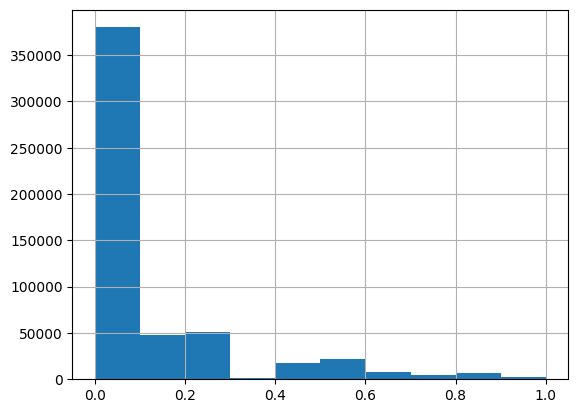

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

model = XGBRegressor(objective='reg:squarederror', n_estimators=30, random_state=42, n_jobs=-1)
model.fit(X_train_vect, y_train)
y_pred = model.predict(X_test_vect)

punto1_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {punto1_mse}')

MSE: 0.024235323526386836


In [ ]:
print(X_train_vect.shape)
print(X_test_vect.shape)

(362779, 141176)
(178683, 141176)


Al utilizar la función CountVectorizer se crea una matriz que contiene los datos de los tokens, en este caso se obtuvieron 141176 y al utilizar el modelo de XGBRegressor se obtuvo un MSE de 0.024.


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
vectorizer = CountVectorizer(ngram_range=(3, 3))
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

model = XGBRegressor(objective='reg:squarederror', n_estimators=30, random_state=42, n_jobs=-1)
model.fit(X_train_vect, y_train)
y_pred = model.predict(X_test_vect)

punto2_mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {punto2_mse}')

MSE: 0.03763027619090143


In [ ]:
print(X_train_vect.shape)
print(X_test_vect.shape)

(362779, 10546378)
(178683, 10546378)


Al considerar trigramas se obtuvieron 10546378 y al utilizar el modelo de XGBRegressor se obtuvo un MSE de 0.037, por lo que se deduce que al aumentar la complejidad, ya que se tienen más tokens, a pesar de que se espera tener mejores resultados ya que se le agrega contexto, en lugar de mejorar, empeora el desempeño del  modelo, lo que indica que el modelo no pudo aprovechar la información añadida y que esto le genero más dificultad para aprender.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

# **TF-IDF (TERM FREQUENCY - INVERSE DOCUMENT FREQUENCY)**
Esta es una estadística que se basa en la frecuencia de una palabra en el cuerpo de un documento, pero también proporciona una representación numérica de la importancia de una palabra para el análisis estadístico. El valor tf-idf aumenta proporcionalmente al número de veces que una palabra aparece en el documento, pero es compensada por la frecuencia de la palabra en la colección de documentos, lo que permite manejar el hecho de que algunas palabras son generalmente más comunes que otras.

Por ejemplo, que la palabra “el” o “la” aparezca con mucha frecuencia en un documento concreto no quiere decir nada, ya que si analizamos la muestra o colección completa de documentos, veremos que estas palabras son muy comunes. Pero si un documento contiene muchas veces la palabra “mostaza”, las posibilidades de que ese documento sea relevante para la búsqueda “mostaza” crecen, ya que el término es relativamente poco frecuente dentro de la muestra en global.

Ahora, veamos como es calculado TF-IDF:

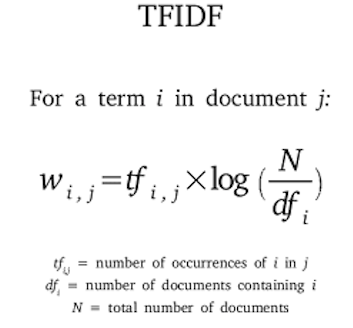

TF es basicamente el recuento de una palabra en una oracion.
DF se denomina frecuencia de documento, lo que significa en cuantos documentos esta presente una determinada palabra dentro de la coleccion entera de documentos.
Además, dado que en la fórmula df está presente en el denominador de log (N/df), se llama frecuencia inversa del documento. De ahí el nombre tf-idf.

**VENTAJAS**

* Se centra en la frecuencia de las palabras presentes en la coleccion entera de documentos pero también proporciona la importancia de las palabras. Perrmitiendo eliminar las palabras que son menos importantes para el análisis, haciendo así que la construcción del modelo sea menos compleja al reducir las dimensiones de entrada.
* Facil de implementar.
* Demostrado empíricamente que es efectivo.

**DESVENTAJAS**

* No proporciona información lingüística sobre las palabras, como el significado real de las palabras, la similitud con otras palabras, etc.
* Basado en que las palabras son mutuamente independientes.
* Ajustar los parámetros del modelo puede ser computacionalmente difícil.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
tfidf = TfidfVectorizer()

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = XGBRegressor(objective='reg:squarederror', n_estimators=30, random_state=42, n_jobs=-1)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

punto4_mse = mean_squared_error(y_test, y_pred)
print(f'MSE con TF-IDF: {punto4_mse}')

MSE con TF-IDF: 0.024042573476482282


Se observa que el MSE considerando trigramas es más alto (peor desempeño) que el calculado usando TF-IDF (MSE de 0.02404). Esto puede sugerir que el modelo de TF-IDF a pesar de que captura solo la influencia indivual de las palabras, al tener en cuenta su frecuencia tiene una mejor capacidad para aprender relaciones útiles entre los tokens.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

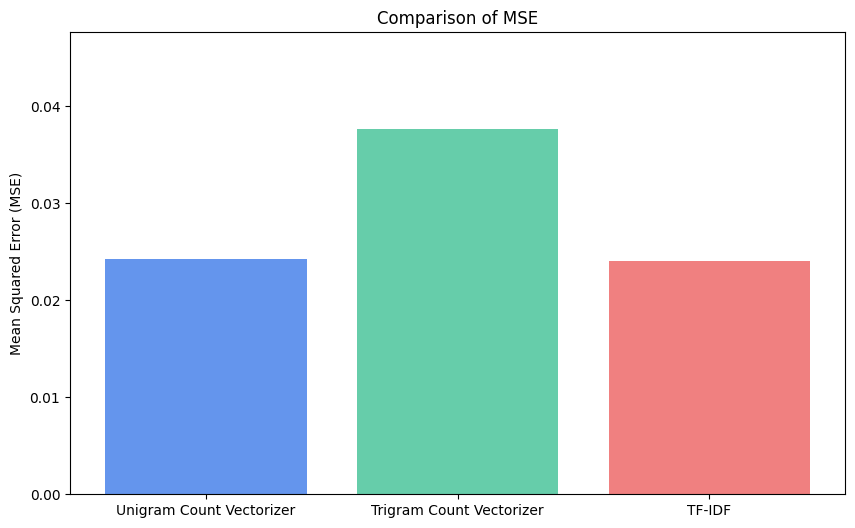

In [ ]:
# Celda 5
mse_values = [punto1_mse, punto2_mse, punto4_mse]
scenarios = ["Unigram Count Vectorizer", "Trigram Count Vectorizer", "TF-IDF"]


plt.figure(figsize=(10, 6))
plt.bar(scenarios, mse_values, color=['cornflowerblue', 'mediumaquamarine', 'lightcoral'])
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE')
plt.ylim(0, max(mse_values) + 0.01)
plt.show()

Conclusion:

- Luego de ejecutar los 3 modelos, se identifica que el unigrama y el vectorizador Tfidf están capturando casi que la misma proporción de información aunque el segundo tipo es levemente mejor ya que tiene un Mean Squared Error de 0.02404, los valores son muy similares, por lo que se recomienda realizar una evaluación más detallada mediante técnicas de preprocesamiento y ajuste de hiperparámetros para identificar una diferencia real entre ambos enfoques.

- Por otro lado el modelo de countVectorizer+Trigramas aporta el peor desempeño del modelo con un MSE de 0.037, posiblemente debido a que la mayor complejidad hace que al modelo le cueste aprender relaciones importantes entre los tokens.